<a href="https://colab.research.google.com/github/schenita/info5731/blob/master/Floyd_Self_Study_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Schenita Floyd
# Self Study 9
# Grus: Chapter 5, 6, 7

In [0]:
# Chapter 5 - Statistics

In [0]:
# Describing a singel set of data

In [0]:
num_friends = [100, 49, 41, 40, 25]

In [0]:
# Histogram

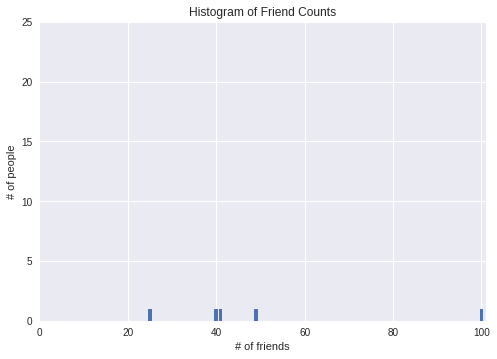

In [40]:
from collections import Counter
from __future__ import division
import math
import matplotlib.pyplot as plt
friend_counts = Counter(num_friends) 
xs = range(101)
ys = [friend_counts[x] for x in xs] 
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [0]:
num_points = len(num_friends)

In [0]:
largest_value = max(num_friends)

In [0]:
mallest_value = min(num_friends)

In [0]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

In [0]:
# Central Tendencies

In [16]:
# this isn't right if you don't from __future__ import division
def mean(x):
  return sum(x) / len(x)
mean(num_friends)

51

In [18]:
def median(v):
  """finds the 'middle-most' value of v""" 
  n = len(v)
  sorted_v = sorted(v)
  midpoint = n // 2

  if n % 2 == 1:
    # if odd, return the middle value 
    return sorted_v[midpoint]
  else:
    # if even, return the average of the middle values 
    lo = midpoint - 1
    hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends)

41

In [0]:
# Quantile

In [22]:
def quantile(x, p):
  p_index = int(p * len(x))
  return sorted(x)[p_index]
quantile(num_friends, 0.10) # 1 
quantile(num_friends, 0.25) # 3 
quantile(num_friends, 0.75) # 9 
quantile(num_friends, 0.90) # 13

100

In [23]:
def mode(x): 
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.iteritems()
    if count == max_count] 
    
mode(num_friends) # 1 and 6

[40, 49, 100, 25, 41]

In [0]:
# Dispersion

In [25]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
  return max(x) - min(x)
data_range(num_friends) # 99

75

In [0]:
def sum_of_squares(n):
    return sum([i**2 for i in range(1, n+1)])
  
def de_mean(x):
  """translate x by subtracting its mean (so the result has mean 0)""" 
  x_bar = mean(x)
  return [x_i - x_bar for x_i in x]

def variance(x):
  """assumes x has at least two elements""" 
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)



In [0]:
import math
def standard_deviation(x): 
  return math.sqrt(variance(x)) 

In [0]:
def interquartile_range(x):
  return quantile(x, 0.75) - quantile(x, 0.25)

In [0]:
# Correlation

In [0]:

from vector import dot
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
def covariance(x, y): 
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1) 
covariance(num_friends, daily_minutes)

In [0]:
def correlation(x, y):
  stdev_x = standard_deviation(x) 
  stdev_y = standard_deviation(y) 
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / stdev_x / stdev_y 
  else:
    return 0 # if no variation, correlation is zero 

In [0]:
outlier = num_friends.index(100) # index of outlier
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x
                     for i, x in enumerate(daily_minutes)
                     if i != outlier] 

In [0]:
#Other Correlationals Caveats

In [0]:
x=[-2,-1,0,1,2] 
y=[2, 1,0,1,2]

In [0]:
x=[-2,1,0,1,2]
y = [99.98, 99.99, 100, 100.01, 100.02]


In [0]:
# Chapter 6 - Probability

In [0]:
# Dependence and Independence

In [0]:
import random
def random_kid():
  return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
  younger = random_kid() 
  older = random_kid() 
  if older == "girl":
    older_girl += 1
  if older == "girl" and younger == "girl":
    both_girls += 1
  if older == "girl" or younger == "girl":
    either_girl += 1

In [5]:
print "P(both | older):", both_girls / older_girl

P(both | older): 0


In [6]:
print "P(both | either): ", both_girls / either_girl

P(both | either):  0


In [0]:
# Bayes's Theorem, Random Variables, Continuous Distribution

In [0]:
def uniform_pdf(x): 
  return 1 if x >= 0 and x < 1 else 0

In [0]:
def uniform_cdf(x):
  "returns the probability that a uniform random variable is <= x"
  if x < 0: return 0 
  elif x < 1: return x 
  else: return 1

In [0]:
# Normal Distribution

In [0]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

In [0]:
from matplotlib import pyplot as plt
import math, random
def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.title("Various Normal pdfs")
    plt.show()   

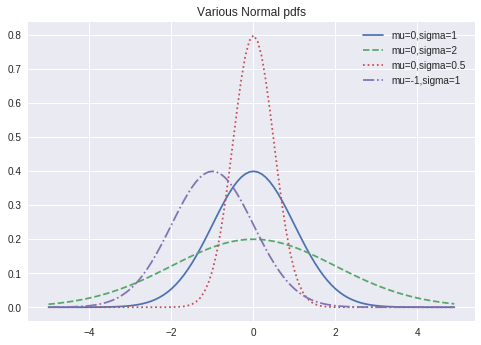

In [23]:
plot_normal_pdfs(plt)

In [0]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2  
  
def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

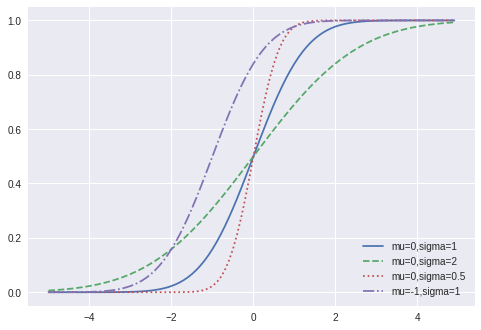

In [29]:
plot_normal_cdfs(plt)

In [0]:
# Inverted

In [0]:
from __future__ import division
from collections import Counter
import math, random
p = 3
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [36]:
inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001)

9.999990463256836

In [0]:
# The Central Limit Theorem

In [0]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0


In [0]:
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

In [0]:
def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

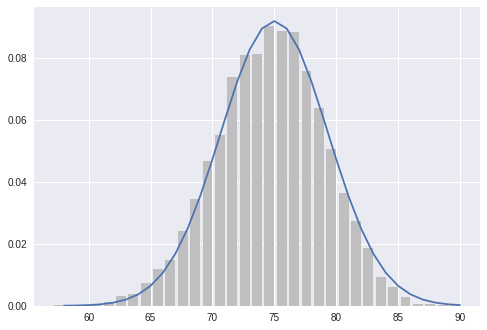

In [42]:
make_hist(0.75, 100, 10000)

In [0]:
# Chapter 7 - Hypothesis and Inference

In [0]:
from __future__ import division
import math, random


In [0]:

def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma


In [0]:
# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf


In [0]:
 # it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1): 
  return 1 - normal_cdf(lo, mu, sigma)

In [0]:
 # it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
  return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

In [0]:
# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1): 
  return 1 - normal_probability_between(lo, hi, mu, sigma)


In [0]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

In [0]:
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

In [0]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds 
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

In [0]:
from scipy.stats import binom
from scipy.stats import norm
# upper bound should have tail_probability above it
upper_bound = normal_lower_bound(tail_probability, mu, sigma)

# lower bound should have tail_probability below it
lower_bound = normal_upper_bound(tail_probability, mu, sigma)

In [0]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)


In [0]:
normal_two_sided_bounds(0.95, mu_0, sigma_0) # (469, 531)

In [0]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0) 

# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval 
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1) 
power = 1 - type_2_probability

In [0]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)

In [0]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is above x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is below x
        return 2 * normal_probability_below(x, mu, sigma)   

In [69]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598857

In [0]:
def count_extreme_values():
    extreme_value_count = 0
    for _ in range(100000):
        num_heads = sum(1 if random.random() < 0.5 else 0    # count # of heads
                        for _ in range(1000))                # in 1000 flips
        if num_heads >= 530 or num_heads <= 470:             # and count how often
            extreme_value_count += 1                         # the # is 'extreme'

    return extreme_value_count / 100000

In [0]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below    

In [72]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582083

In [73]:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

In [0]:
# Confidence Intervals

In [0]:
from math import log
math.sqrt(p * (1 - p) / 1000)

In [0]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)

In [0]:
normal_two_sided_bounds(0.95, mu, sigma)

In [0]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)

In [0]:
normal_two_sided_bounds(0.95, mu, sigma) 

In [0]:
def run_experiment():
  """flip a fair coin 1000 times, True = heads, False = tails""" 
  return [random.random() < 0.5 for _ in range(1000)]

In [0]:
def reject_fairness(experiment):
  """using the 5% significance levels"""
  num_heads = len([flip for flip in experiment if flip])
  return num_heads < 469 or num_heads > 531

In [85]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)] 
num_rejections = len([experiment
                      for experiment in experiments 
                      if reject_fairness(experiment)])
print num_rejections

46


In [0]:
# Running an A/B Test

In [0]:
def estimated_parameters(N, n): 
  p= n / N
  sigma = math.sqrt(p * (1 - p) / N) 
  return p, sigma

In [0]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
  p_A, sigma_A = estimated_parameters(N_A, n_A)
  p_B, sigma_B = estimated_parameters(N_B, n_B)
  return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)


In [0]:
z = a_b_test_statistic(1000, 200, 1000, 180)

In [90]:
two_sided_p_value(z)

0.254141976542236

In [93]:
z = a_b_test_statistic(1000, 200, 1000, 150)
two_sided_p_value(z)

0.003189699706216853

In [0]:
# Bayesian Inference

In [0]:
def B(alpha, beta):
  """a normalizing constant so that the total probability is 1""" 
  return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

In [0]:
def beta_pdf(x, alpha, beta):
  if x < 0 or x > 1: # no weight outside of [0, 1]
    return 0 
  return x ** (alpha-1) * (1-x) ** (beta-1)/B(alpha,beta)


In [102]:
beta_pdf(3,20,20)

0